In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error
%matplotlib inline

# Tree-Based Methods

As discussed before, tree-based methods have following disadvantages

* Unfortunately, trees generally do not have the same level of predictive accuracy as some of the other regression and classification approaches.
+ Additionally, trees can be very non-robust. In other words, a small change in the data can cause a large change in the final estimated tree.

However, by aggregating many decision trees, using methods like bagging, random forests, and boosting, the predictive performance of trees can be substantially improved. 

## Bagging and Random Forests

### Bagging

The decision trees we discussed suffer from high variance. This means that if we split the training data into two parts at random, and fit a decision tree to both halves, the results that we get could be quite different. In contrast, a procedure with low variance will yield similar results if applied repeatedly to distinct data sets; linear regression tends to have low variance, if the ratio of n to p is moderately large. Bagging is a general-purpose procedure for reducing the variance of a statistical learning method; we introduce it here because it is particularly useful and frequently used in the context of decision trees.

A natural way to reduce the variance and hence increase the prediction accuracy of a statistical learning method is to take many training sets from the population, build a separate prediction model using each training set, and average the resulting predictions. In other words, we could calculate $\hat f^1(x), \hat f^2(x), . . . , \hat f^B(x)$ using B separate training sets, and average them in order to obtain a single low-variance statistical learning model given by:
$$\hat f_{avg}(x)=\frac{1}{B}\sum^B_b \hat f^b(x) $$

Of course, this is not practical because we generally do not have access to multiple training sets. Instead, we can bootstrap, by taking repeated samples from the (single) training data set. In this approach we generate B different bootstrapped training data sets. We then train our method on the bth bootstrapped training set in order to get  $\hat f^{*b}(x)$ and finally average all the predictions, to obtain
$$\hat f_{avg}(x)=\frac{1}{B}\sum^B_b \hat f^{*b}(x) $$

While bagging can improve predictions for many regression methods, it is particularly useful for decision trees. To apply bagging to regression trees, we simply construct B regression trees using B bootstrapped training sets, and average the resulting predictions. These trees are grown deep, and are not pruned. Hence each individual tree has high variance, but
low bias. Averaging these B trees reduces the variance. Bagging has been demonstrated to give impressive improvements in accuracy by combining together hundreds or even thousands of trees into a single procedure.

It turns out that there is a very straightforward way to estimate the test error of a bagged model, without the need to perform cross-validation or the validation set approach. Recall that the key to bagging is that trees are repeatedly fit to bootstrapped subsets of the observations. One can show that on average, each bagged tree makes use of around two-thirds of the observations (outside the course). The remaining one-third of the observations not used to fit a
given bagged tree are referred to as the out-of-bag (OOB) observations. We can predict the response for the ith observation using each of the trees in which that observation was OOB. An OOB prediction can be obtained in this way for each of the n observations, from which the overall OOB MSE (for a regression problem) or classification error (for a
classification problem) can be computed. The resulting OOB error is a valid estimate of the test error for the bagged model, since the response for each observation is predicted using only the trees that were not fit using that observation.

### Random Forest

Random forests provide an improvement over bagged trees by way of a small tweak that decorrelates the trees. As in bagging, we build a number of decision trees on bootstrapped training samples. But when building these decision trees, each time a split in a tree is considered, a random sample of m predictors is chosen as split candidates from the full set of p predictors. The split is allowed to use only one of those m predictors. A fresh sample of m predictors is taken at each split, and typically we choose $m \approx \sqrt{p}$—that is, the number of predictors considered at each split is approximately equal to the square root of the total number of predictors.

Let's see if we can improve on this result using **bagging** and **random forests**. The exact results obtained in this section may
depend on the version of ${\tt python}$ and the version of the ${\tt RandomForestRegressor}$ package
installed on your computer, so don't stress out if you don't match up exactly with the book. Recall that **bagging** is simply a special case of
a **random forest** with $m = p$. Therefore, the ${\tt RandomForestRegressor()}$ function can
be used to perform both random forests and bagging. Let's start with bagging:

In [3]:
boston_df = pd.read_csv('Boston.csv')
X = boston_df.drop('medv', axis=1)
y = boston_df.medv
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.5, random_state=0)

# Bagging: using all features
regr1 = RandomForestRegressor(max_features=13, random_state=1)
regr1.fit(X_train, y_train)

/home/hhp468/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/hhp468/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=13, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=None, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

The argument ${\tt max\_features=13}$ indicates that all 13 predictors should be considered
for each split of the tree -- in other words, that bagging should be done. How
well does this bagged model perform on the test set?

17.738119762845848

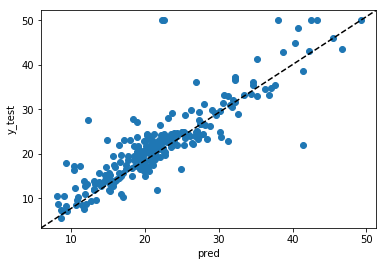

In [3]:
pred = regr1.predict(X_test)
plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')
mean_squared_error(y_test, pred)

The test setMSE associated with the bagged regression tree is significantly lower than our single tree!

We can grow a random forest in exactly the same way, except that
we'll use a smaller value of the ${\tt max\_features}$ argument. Here we'll
use ${\tt max\_features = 6}$:

In [4]:
# Random forests: using 6 features
regr2 = RandomForestRegressor(max_features=6, random_state=1)
regr2.fit(X_train, y_train)

pred = regr2.predict(X_test)
mean_squared_error(y_test, pred)

/home/tuando0907/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


17.27308972332016

The test set MSE is even lower; this indicates that random forests yielded an
improvement over bagging in this case.

Using the ${\tt feature\_importances\_}$ attribute of the ${\tt RandomForestRegressor}$, we can view the importance of each
variable:

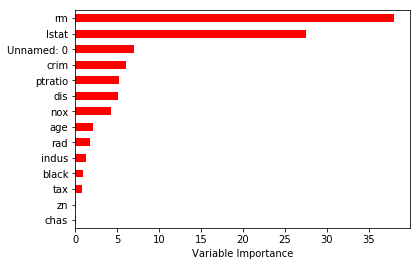

In [5]:
Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100}, index=X.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

The results indicate that across all of the trees considered in the random
forest, the wealth level of the community (${\tt lstat}$) and the house size (${\tt rm}$)
are by far the two most important variables.

##  Boosting

Recall that bagging involves creating multiple copies of the original training data set using the bootstrap, fitting a separate decision tree to each copy, and then combining all of the trees in order to create a single predictive model. Notably, each tree is built on a bootstrap data set, independent of the other trees. Boosting works in a similar way, except that the trees are grown *sequentially*: each tree is grown using information from previously grown trees. Boosting does not involve bootstrap sampling; instead each tree is fit on a modified version of the original data set. 
The Algorithm of Boosting is:
![alt text](tree2.png)

What is the idea behind this procedure? Unlike fitting a single large decision tree to the data, which amounts to fitting the data hard and potentially overfitting, the boosting approach instead learns slowly. Given the current model, we fit a decision tree to the residuals from the model. That is, we fit a tree using the current residuals, rather than the outcome Y , as the response. We then add this new decision tree into the fitted function in order to update the residuals. Each of these trees can be rather small, with just a few terminal nodes, determined by the parameter d in the algorithm. By fitting small trees to the residuals, we slowly improve $\hat f$ in areas where it does not perform well. The shrinkage parameter $\lambda$ slows the process down even further, allowing more and different shaped trees to attack the residuals. In general, statistical learning approaches that learn slowly tend to perform well. Note that in boosting, unlike in bagging, the construction of each tree depends strongly on the trees that have already been grown.

Boosting has three tuning parameters:
* The number of trees B. Unlike bagging and random forests, boosting can overfit if B is too large, although this overfitting tends to occur slowly if at all. We use cross-validation to select B.
+ The shrinkage parameter $\lambda$, a small positive number. This controls the rate at which boosting learns. Typical values are 0.01 or 0.001, and the right choice can depend on the problem. Very small $\lambda$ can require using a very large value of B in order to achieve good performance.
+ The number d of splits in each tree, which controls the complexity of the boosted ensemble. Often d = 1 works well, in which case each tree is a stump, consisting of a single split. In this case, the boosted ensemble is fitting an additive model, since each term involves only a single variable. More generally d is the *interaction depth*, and controls the interaction order of the boosted model, since d splits can involve at most d variables.

Now we'll use the ${\tt GradientBoostingRegressor}$ package to fit **boosted
regression trees** to the ${\tt Boston}$ data set. The
argument ${\tt n_estimators=500}$ indicates that we want 500 trees, and the option
${\tt interaction.depth=4}$ limits the depth of each tree:

In [6]:
regr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, max_depth=4, random_state=1)
regr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=1, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

Let's check out the feature importances again:

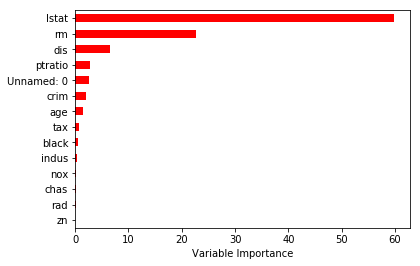

In [7]:
feature_importance = regr.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X.columns).sort_values(inplace=False)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

We see that ${\tt lstat}$ and ${\tt rm}$ are again the most important variables by far. Now let's use the boosted model to predict ${\tt medv}$ on the test set:

In [8]:
mean_squared_error(y_test, regr.predict(X_test))

17.63496379966654

The test MSE obtained is similar to the test MSE for random forests
and superior to that for bagging. If we want to, we can perform boosting
with a different value of the shrinkage parameter $\lambda$. Here we take $\lambda = 0.2$:

In [9]:
regr2 = GradientBoostingRegressor(n_estimators=500, learning_rate=0.2, max_depth=4, random_state=1)
regr2.fit(X_train, y_train)
mean_squared_error(y_test, regr2.predict(X_test))

15.926619067217192

In this case, using $\lambda = 0.2$ leads to a slightly lower test MSE than $\lambda = 0.01$.

Answer the following questions:
 - What's one real-world scenario where you might try using Bagging?
 - What's one real-world scenario where you might try using Random Forests?
 - What's one real-world scenario where you might try using Boosting?